# Lepton-Jet Isolation 2D Study
#### Okay, since we checked the basic Lepton-Jet isolation distribution, let's move on to 2D plot study
#### PT of DP (or LJ), Lxy, Dxy (or displacement) and $M_{jj}$ will be good starting point at this moment

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(os.getcwd()).split("/sidm")[0]
# sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,
Comm: tls://192.168.121.138:8786,Workers: 0
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,Total threads: 0
Started: 1 minute ago,Total memory: 0 B


In [3]:
samples = [
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_150GeV_5p0GeV_0p27mm",
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
    "2Mu2E_800GeV_5p0GeV_0p05mm",
    "2Mu2E_1000GeV_5p0GeV_0p04mm",  

    "4Mu_100GeV_5p0GeV_0p4mm",
    "4Mu_150GeV_5p0GeV_0p27mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_80p0mm",
    "4Mu_800GeV_5p0GeV_0p05mm",
    "4Mu_1000GeV_5p0GeV_0p04mm",
    
    "TTJets",
]

In [4]:
fileset = utilities.make_fileset(samples[:7], 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                 max_files = 10,
                                )

fileset = utilities.make_fileset(samples[7:14], 
                                 "llpNanoAOD_v2",
                                 location_cfg="signal_4mu_v10.yaml",
                                fileset=fileset,
                                max_files = 10, 
                                #max_files =1, 
                                )

fileset = utilities.make_fileset(samples[14:15], 
                                 "skimmed_llpNanoAOD_v2",
                                 location_cfg="backgrounds.yaml",
                                fileset=fileset,
                                max_files = 20, 
                                #max_files =1, 
                                )

In [ ]:
runner = processor.Runner(
    # executor=processor.DaskExecutor(client=client),
    executor=processor.IterativeExecutor(),
    # executor=processor.FuturesExecutor(), 
    schema=NanoAODSchema,
#    maxchunks=10, 
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["isolation_base", "lj_lj_base", "abcd_base", "lj_base", "displacement_base"],
    lj_reco_choices=["0.4"],
    unweighted_hist=True,
)

import coffea.util as coffea_util
coffea_util.save(p, "processor.coffea")
print(coffea_util.load("processor.coffea"))
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset, treename="Events", processor_instance=p)

out = output["out"]

Output()

Output()

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.10/site-packages/awkward/_connect/_numpy.py:197: RuntimeWarning: overflow encountered in 
power
  result = getattr(ufunc, method)(

/usr/local/lib/python3.10/site-packages/awkward/_connect/_numpy.py:197: RuntimeWarning: invalid value encountered 
in divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.10/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

## Okay, let's start with the few variables that candidate of our future ABCD method

In [6]:
colors_s = ['r','b','black']
colors_l = ['r','b','g','orange','purple','deepskyblue','black']

In [7]:
samples_2mu2e = [
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
    "TTJets"
]

samples_4mu = [    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_80p0mm",
    
    "TTJets"
]

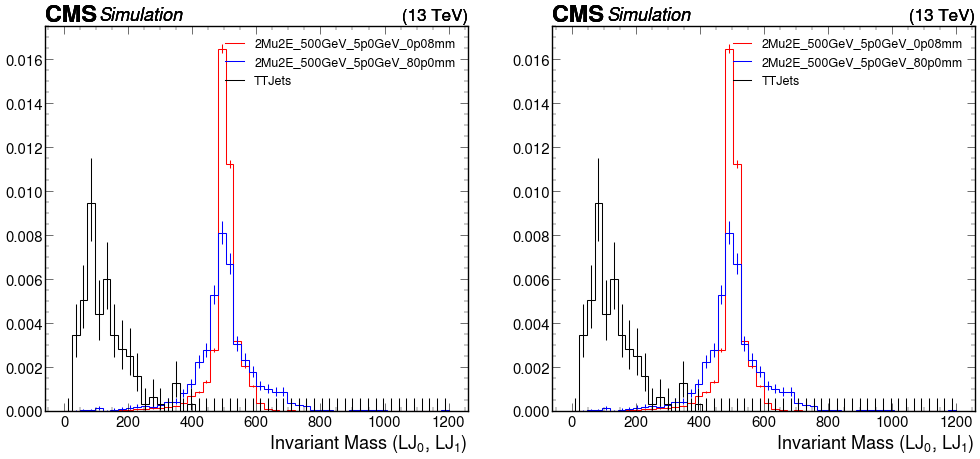

In [8]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True, color=colors_s[i])
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(1,2,2)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True, color=colors_s[i])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

In [9]:
samples_2mu2e = [
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_150GeV_5p0GeV_0p27mm",
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_800GeV_5p0GeV_0p05mm",
    "2Mu2E_1000GeV_5p0GeV_0p04mm",  
    
    "TTJets"
]

samples_4mu = [    
    "4Mu_100GeV_5p0GeV_0p4mm",
    "4Mu_150GeV_5p0GeV_0p27mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_800GeV_5p0GeV_0p05mm",
    "4Mu_1000GeV_5p0GeV_0p04mm",
    
    "TTJets"
]

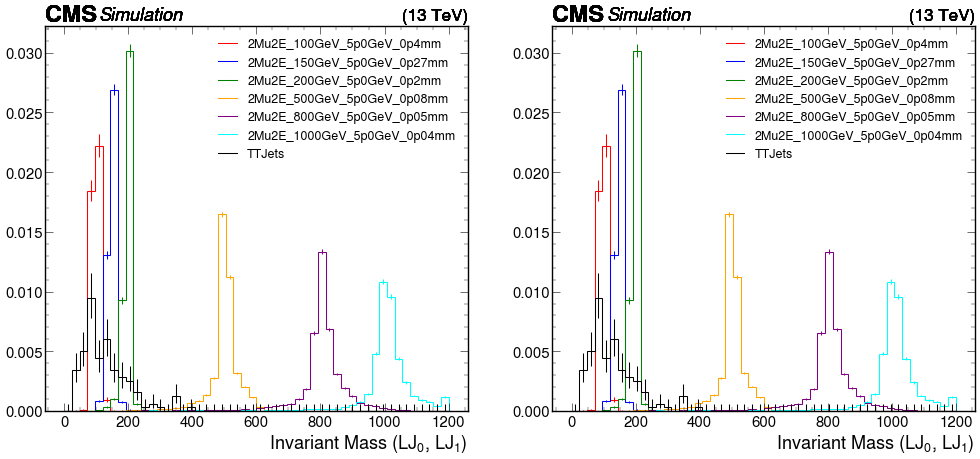

In [10]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True, color=colors_l[i])
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(1,2,2)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["lj_lj_invmass"][channels[0], :], density=True, color=colors_l[i])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### $M_{LJ,LJ}$ clearly shows the peak around BS mass with signal
#### Note that large decay length sample have broader distribution compared to short decay length

#### Clean peak! let's move on

In [11]:
samples_2mu2e = [
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
    "TTJets"
]

samples_4mu = [    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_80p0mm",
    "TTJets"
]

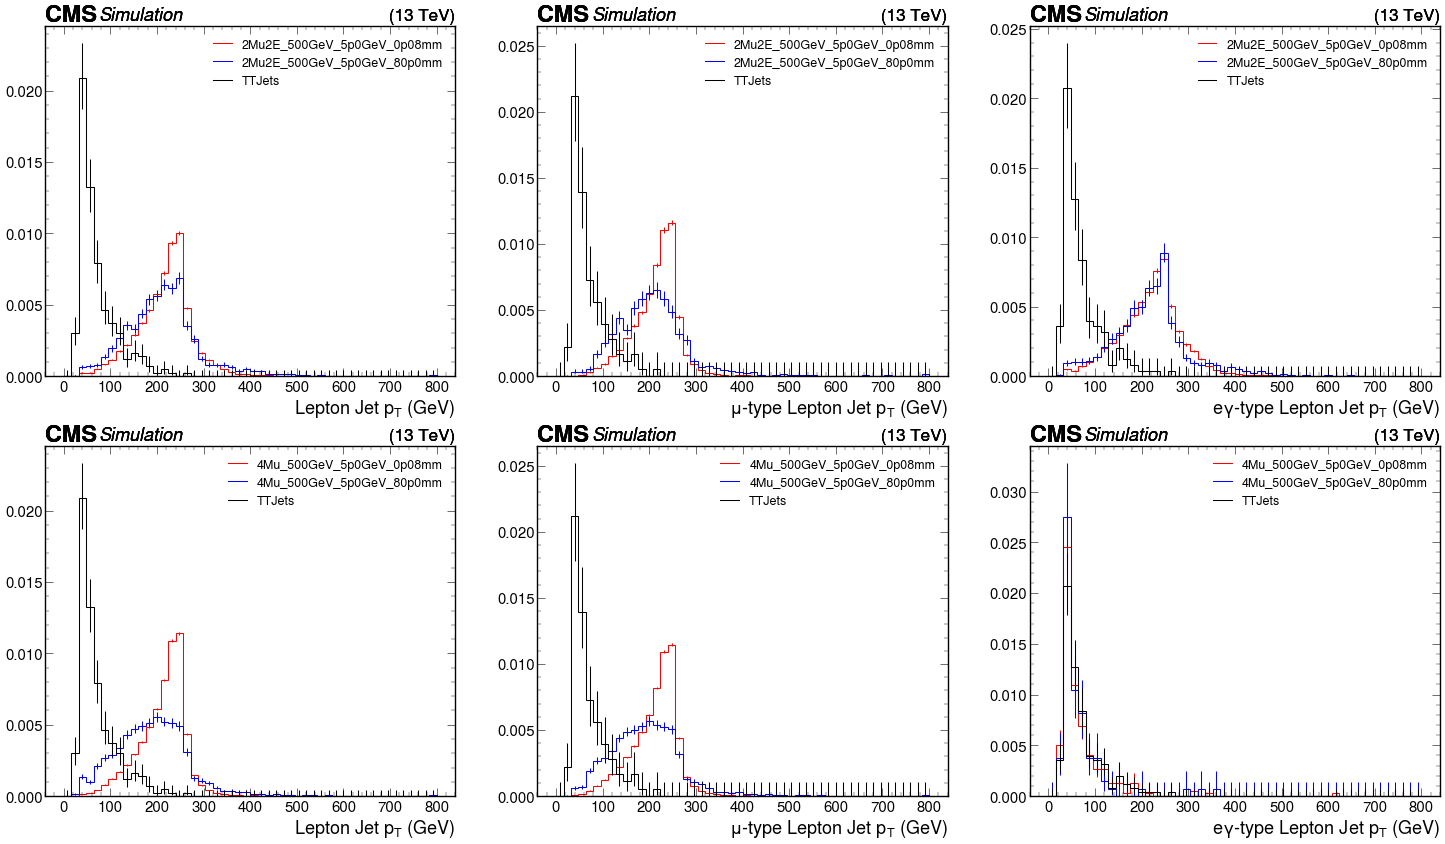

In [12]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["lj_pt"][channels[0], :], density=True, color=colors_s[i])
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["mu_lj_pt"][channels[0], :], density=True, color=colors_s[i])
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["egm_lj_pt"][channels[0], :], density=True, color=colors_s[i])
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["lj_pt"][channels[0], :], density=True, color=colors_s[i])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["mu_lj_pt"][channels[0], :], density=True, color=colors_s[i])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["egm_lj_pt"][channels[0], :], density=True, color=colors_s[i])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

In [13]:
samples_2mu2e = [
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_150GeV_5p0GeV_0p27mm",
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_800GeV_5p0GeV_0p05mm",
    "2Mu2E_1000GeV_5p0GeV_0p04mm",  
    "TTJets"
]

samples_4mu = [    
    "4Mu_100GeV_5p0GeV_0p4mm",
    "4Mu_150GeV_5p0GeV_0p27mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_800GeV_5p0GeV_0p05mm",
    "4Mu_1000GeV_5p0GeV_0p04mm",
    "TTJets"
]

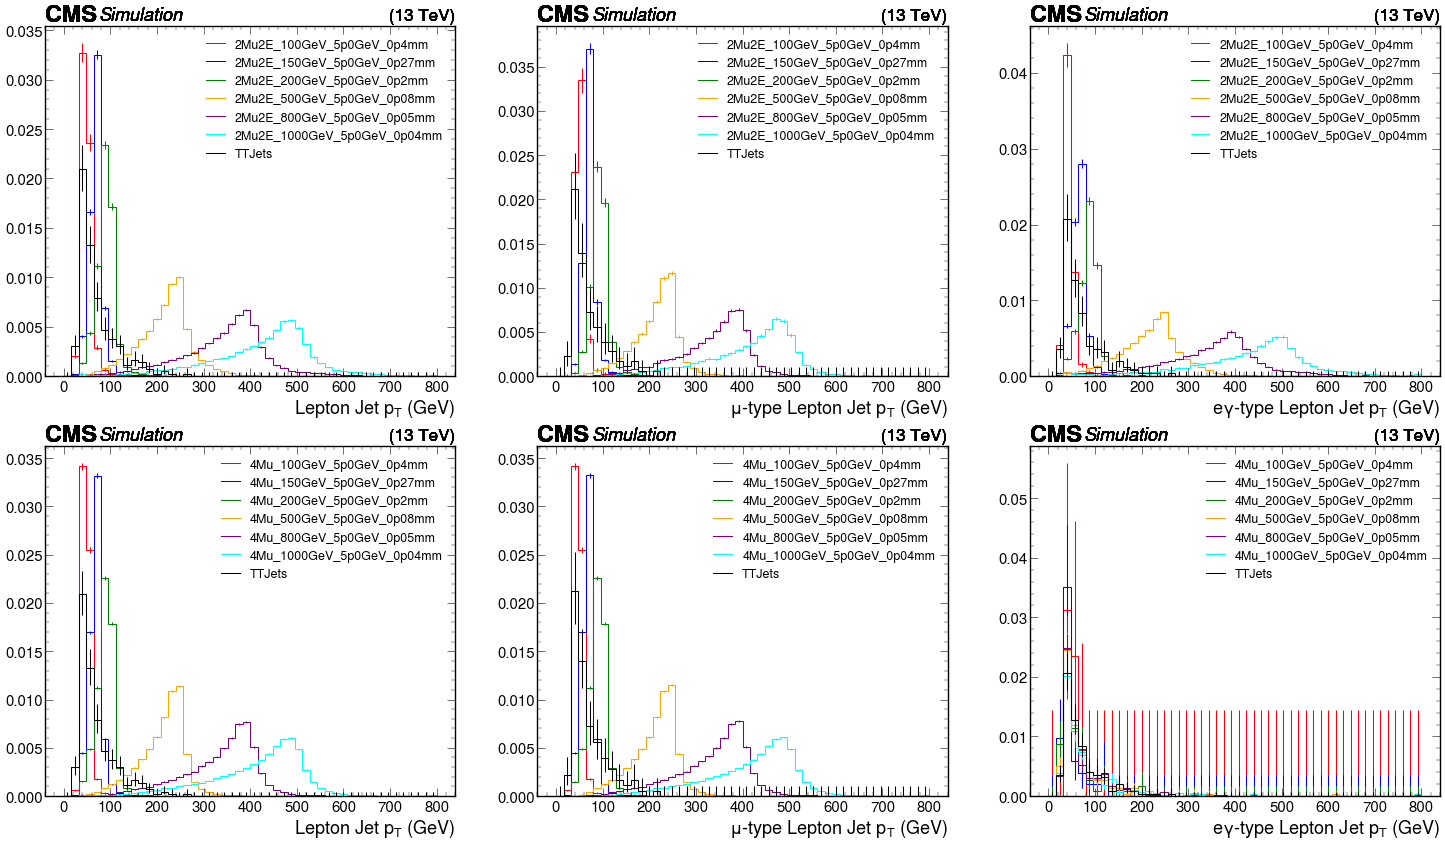

In [14]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["lj_pt"][channels[0], :], density=True, color=colors_l[i])
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["mu_lj_pt"][channels[0], :], density=True, color=colors_l[i])
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["egm_lj_pt"][channels[0], :], density=True, color=colors_l[i])
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["lj_pt"][channels[0], :], density=True, color=colors_l[i])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["mu_lj_pt"][channels[0], :], density=True, color=colors_l[i])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["egm_lj_pt"][channels[0], :], density=True, color=colors_l[i])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### $p_{T}$ of LJ have peak on the half of BS mass

In [15]:
samples_2mu2e = [
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_800GeV_5p0GeV_0p05mm",
    "2Mu2E_1000GeV_5p0GeV_0p04mm",  
    "TTJets"
]

samples_4mu = [    
    "4Mu_100GeV_5p0GeV_0p4mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_800GeV_5p0GeV_0p05mm",
    "4Mu_1000GeV_5p0GeV_0p04mm",
    "TTJets"
]

Text(0.5, 1.0, 'TTJets')

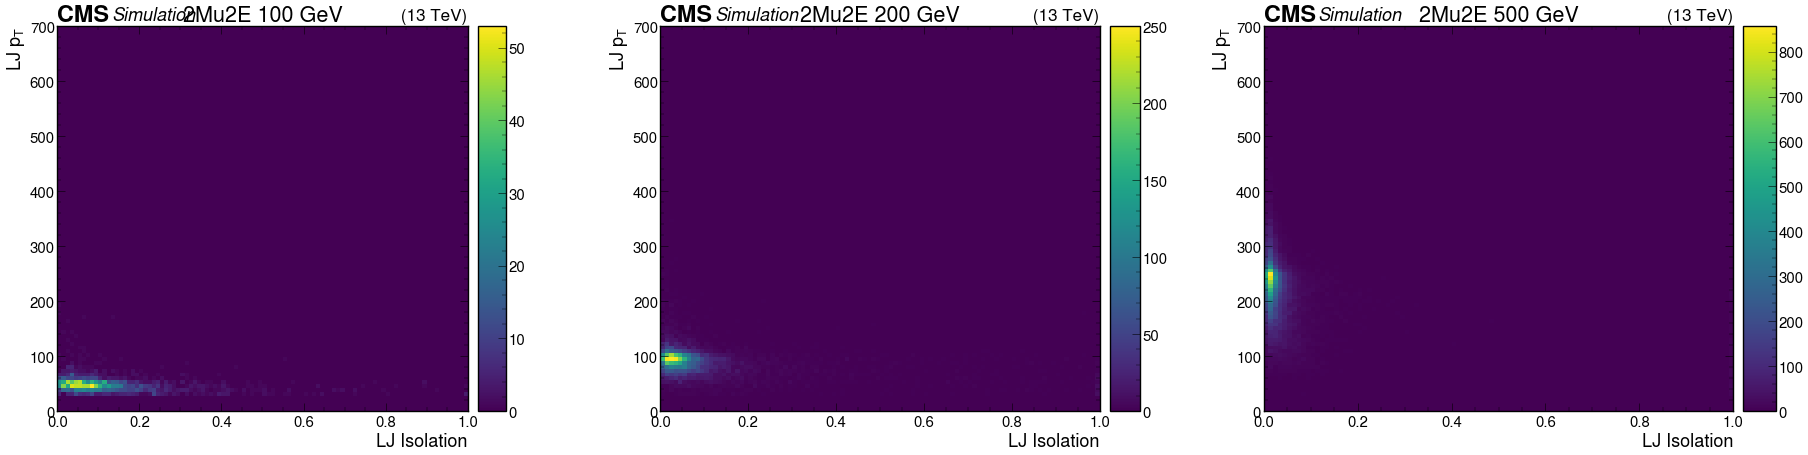

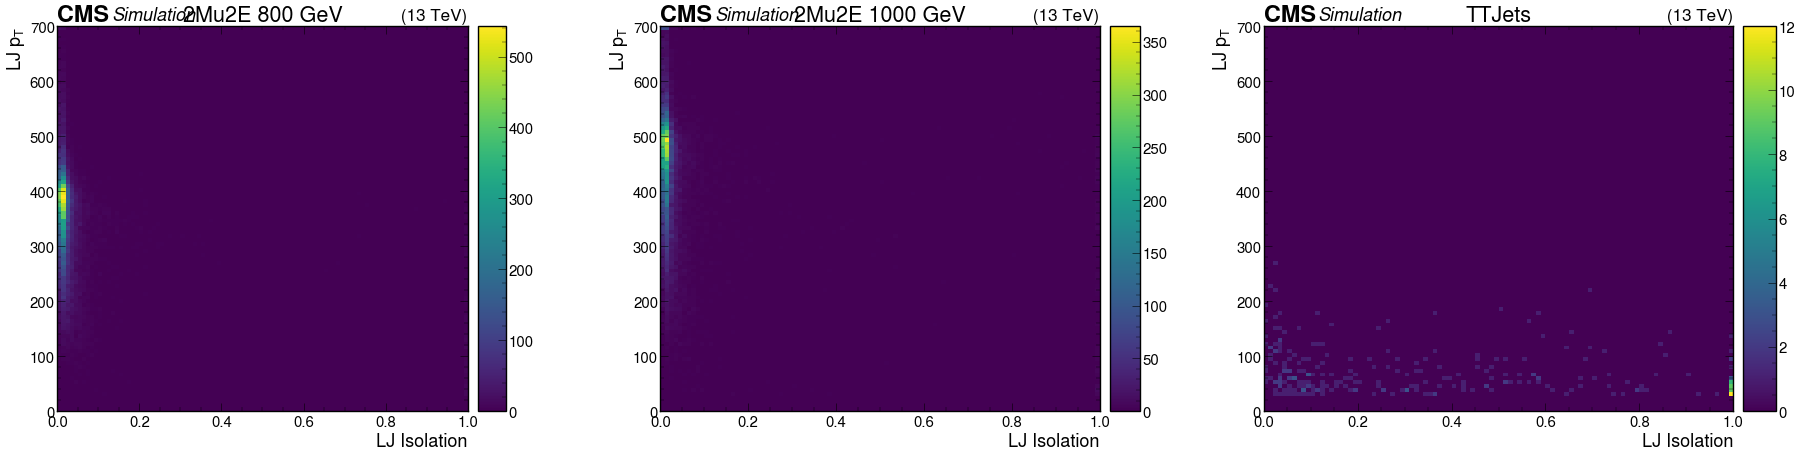

In [16]:
SIG_1 = output["out"][samples_2mu2e[0]]["hists"]
SIG_2 = output["out"][samples_2mu2e[1]]["hists"]
SIG_3 = output["out"][samples_2mu2e[2]]["hists"]
SIG_4 = output["out"][samples_2mu2e[3]]["hists"]
SIG_5 = output["out"][samples_2mu2e[4]]["hists"]
BKG = output["out"][samples_2mu2e[5]]["hists"]

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_1["lj_isolation_lj_pt"][channels[0], :, :])
plt.title("2Mu2E 100 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_2["lj_isolation_lj_pt"][channels[0], :, :])
plt.title("2Mu2E 200 GeV")

plt.subplot(1,3,3)
utilities.plot(SIG_3["lj_isolation_lj_pt"][channels[0], :, :])
plt.title("2Mu2E 500 GeV")

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_4["lj_isolation_lj_pt"][channels[0], :, :])
plt.title("2Mu2E 800 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_5["lj_isolation_lj_pt"][channels[0], :, :])
plt.title("2Mu2E 1000 GeV")

plt.subplot(1,3,3)
utilities.plot(BKG["lj_isolation_lj_pt"][channels[0], :, :])
plt.title("TTJets")

Text(0.5, 1.0, 'TTJets')

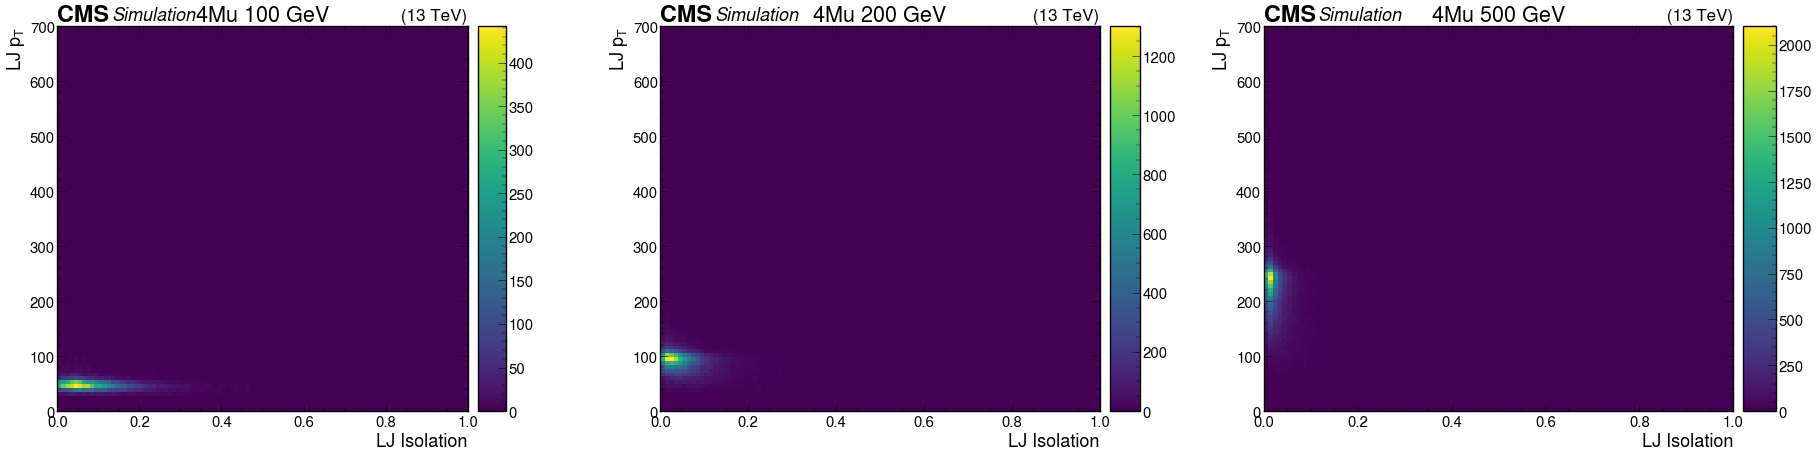

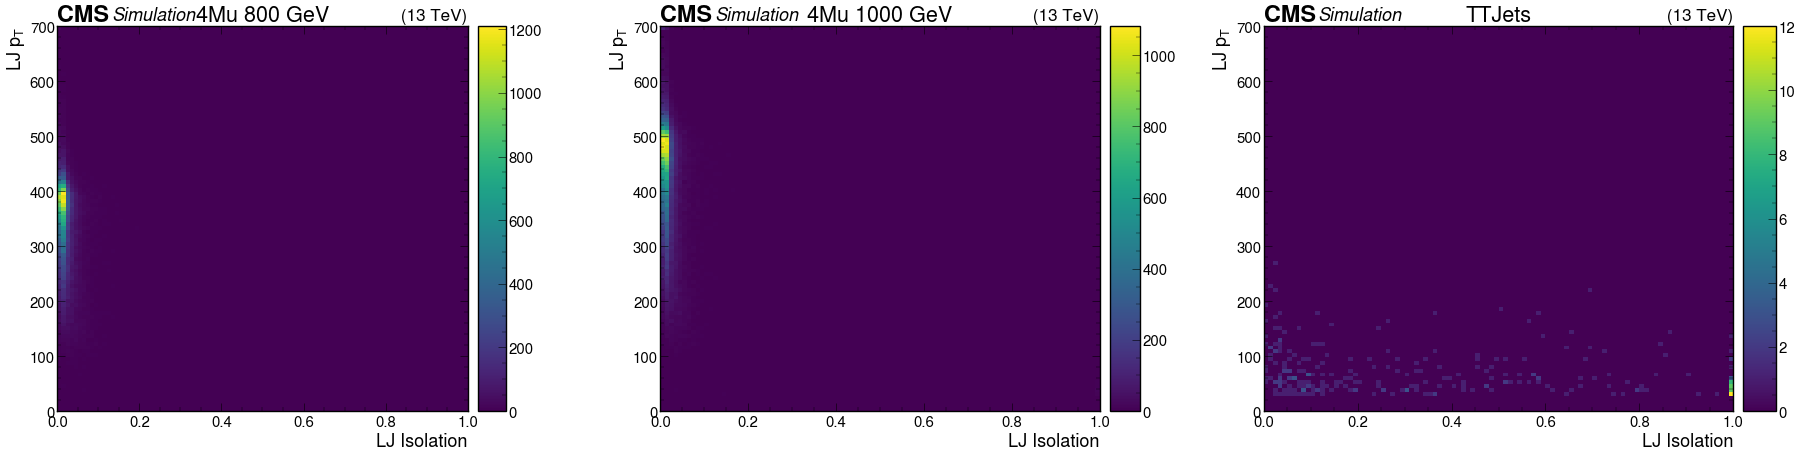

In [17]:
SIG_1 = output["out"][samples_4mu[0]]["hists"]
SIG_2 = output["out"][samples_4mu[1]]["hists"]
SIG_3 = output["out"][samples_4mu[2]]["hists"]
SIG_4 = output["out"][samples_4mu[3]]["hists"]
SIG_5 = output["out"][samples_4mu[4]]["hists"]
BKG = output["out"][samples_4mu[5]]["hists"]

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_1["lj_isolation_lj_pt"][channels[0], :, :])
plt.title("4Mu 100 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_2["lj_isolation_lj_pt"][channels[0], :, :])
plt.title("4Mu 200 GeV")

plt.subplot(1,3,3)
utilities.plot(SIG_3["lj_isolation_lj_pt"][channels[0], :, :])
plt.title("4Mu 500 GeV")

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_4["lj_isolation_lj_pt"][channels[0], :, :])
plt.title("4Mu 800 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_5["lj_isolation_lj_pt"][channels[0], :, :])
plt.title("4Mu 1000 GeV")

plt.subplot(1,3,3)
utilities.plot(BKG["lj_isolation_lj_pt"][channels[0], :, :])
plt.title("TTJets")

In [18]:
samples_2mu2e = [
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_800GeV_5p0GeV_0p05mm",
    "2Mu2E_1000GeV_5p0GeV_0p04mm",
    "TTJets"
    
]

samples_4mu = [    
    "4Mu_100GeV_5p0GeV_0p4mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_800GeV_5p0GeV_0p05mm",
    "4Mu_1000GeV_5p0GeV_0p04mm",
    "TTJets"
]

In [19]:
colors_m = ['r','g','orange','purple','deepskyblue','black']

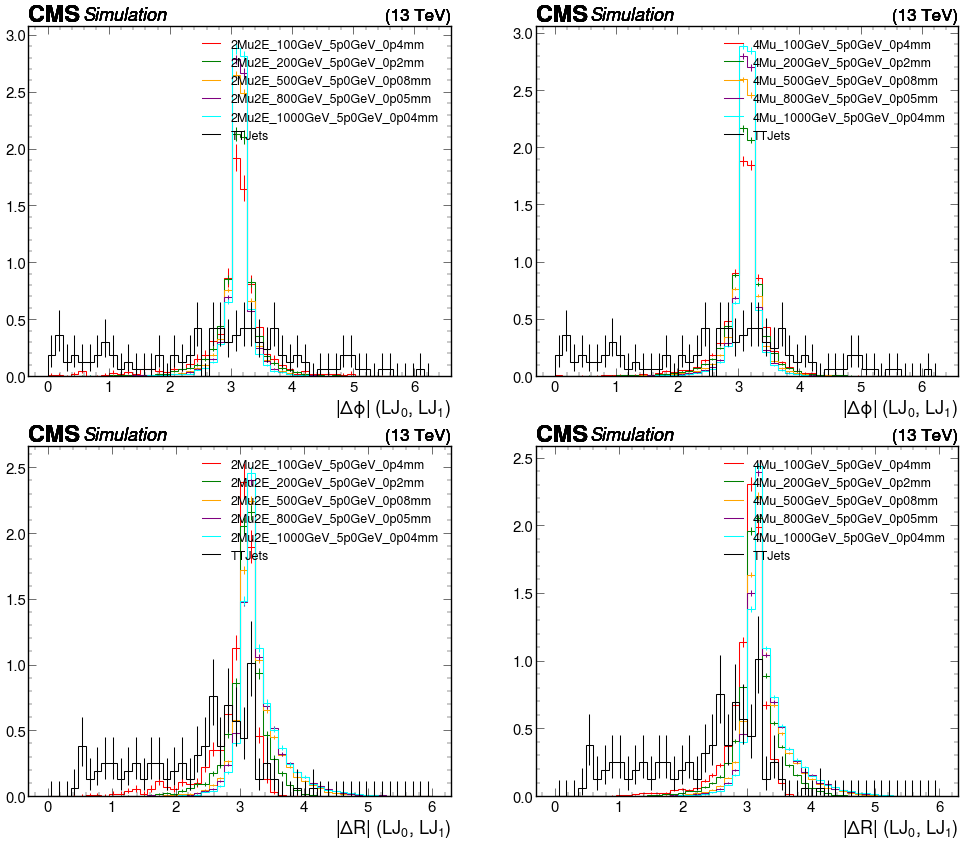

In [22]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["lj_lj_absdphi"][channels[0], :], density=True, color=colors_m[i])
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["lj_lj_absdphi"][channels[0], :], density=True, color=colors_m[i])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["lj_lj_absdR"][channels[0], :], density=True, color=colors_m[i])
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["lj_lj_absdR"][channels[0], :], density=True, color=colors_m[i])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

Text(0.5, 1.0, 'TTJets')

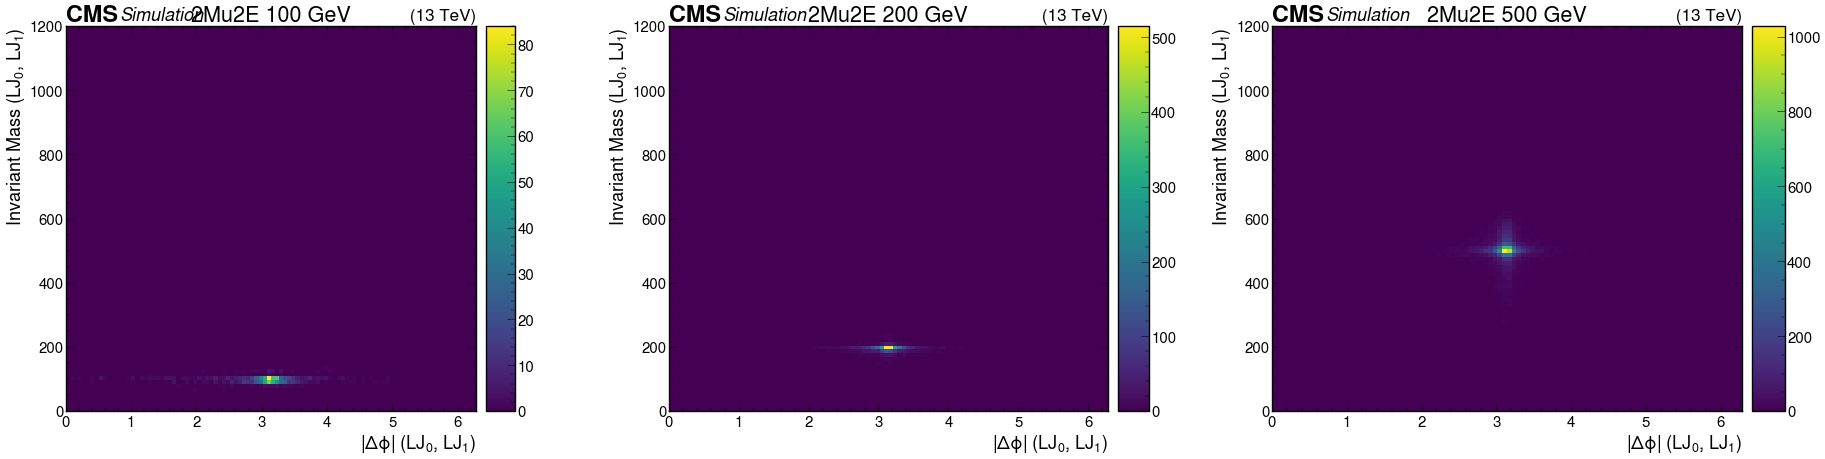

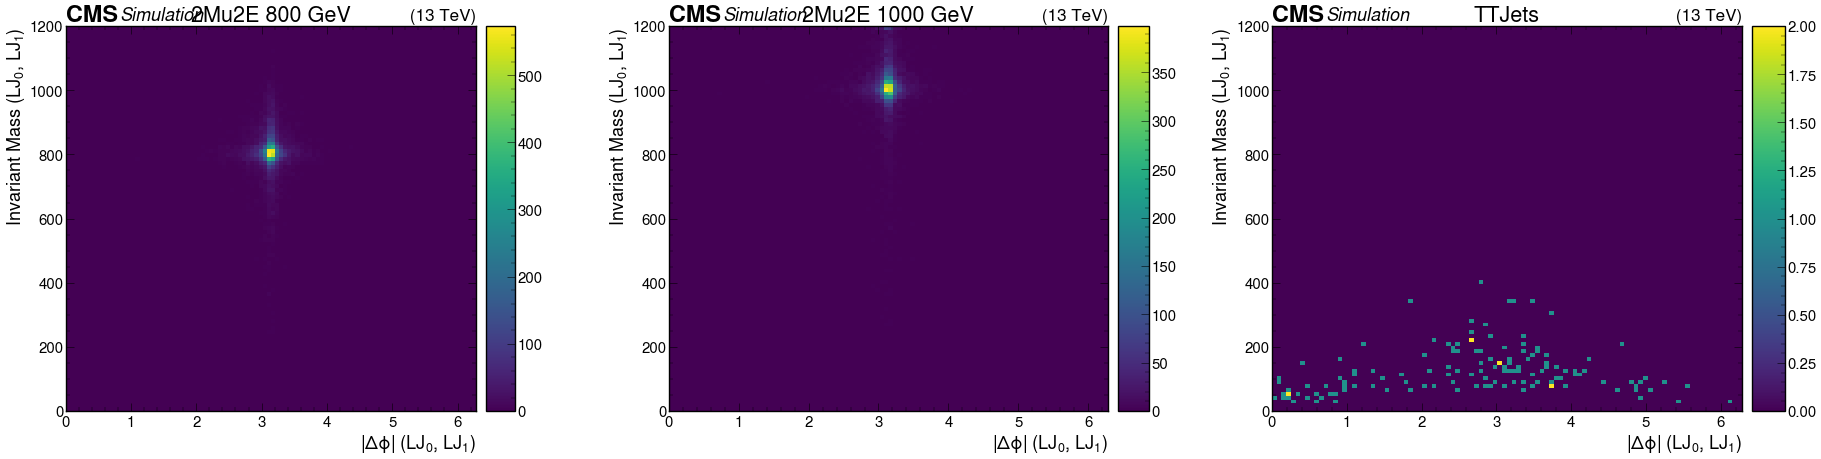

In [23]:
SIG_1 = output["out"][samples_2mu2e[0]]["hists"]
SIG_2 = output["out"][samples_2mu2e[1]]["hists"]
SIG_3 = output["out"][samples_2mu2e[2]]["hists"]
SIG_4 = output["out"][samples_2mu2e[3]]["hists"]
SIG_5 = output["out"][samples_2mu2e[4]]["hists"]
BKG = output["out"][samples_2mu2e[5]]["hists"]

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_1["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("2Mu2E 100 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_2["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("2Mu2E 200 GeV")

plt.subplot(1,3,3)
utilities.plot(SIG_3["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("2Mu2E 500 GeV")

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_4["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("2Mu2E 800 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_5["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("2Mu2E 1000 GeV")

plt.subplot(1,3,3)
utilities.plot(BKG["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("TTJets")

Text(0.5, 1.0, 'TTJets')

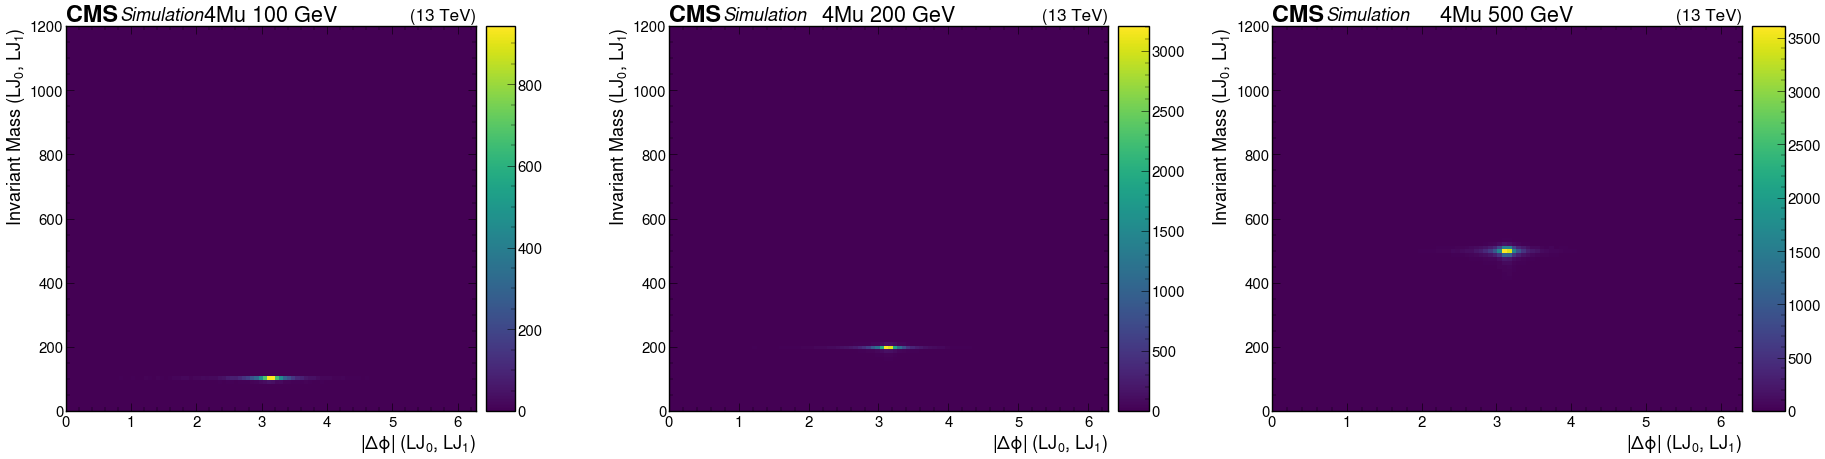

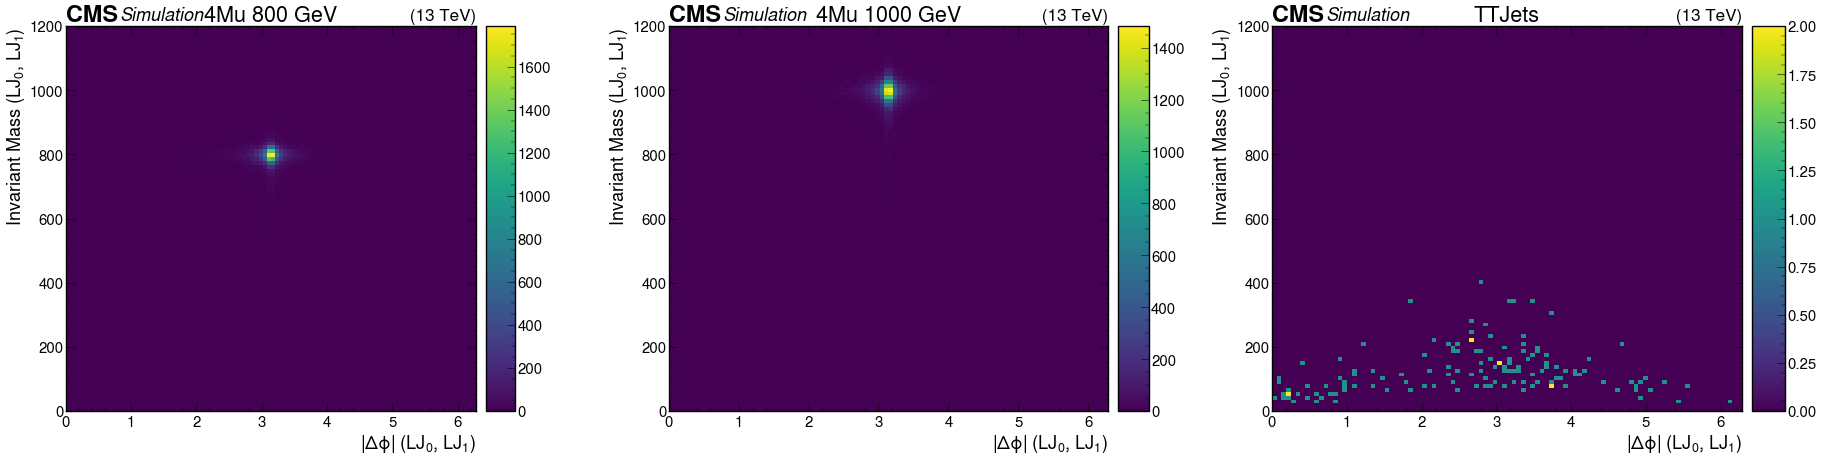

In [24]:
SIG_1 = output["out"][samples_4mu[0]]["hists"]
SIG_2 = output["out"][samples_4mu[1]]["hists"]
SIG_3 = output["out"][samples_4mu[2]]["hists"]
SIG_4 = output["out"][samples_4mu[3]]["hists"]
SIG_5 = output["out"][samples_4mu[4]]["hists"]
BKG = output["out"][samples_4mu[5]]["hists"]

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_1["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("4Mu 100 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_2["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("4Mu 200 GeV")

plt.subplot(1,3,3)
utilities.plot(SIG_3["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("4Mu 500 GeV")

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_4["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("4Mu 800 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_5["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("4Mu 1000 GeV")

plt.subplot(1,3,3)
utilities.plot(BKG["lj_lj_absdphi_invmass"][channels[0], :, :])
plt.title("TTJets")

Text(0.5, 1.0, 'TTJets')

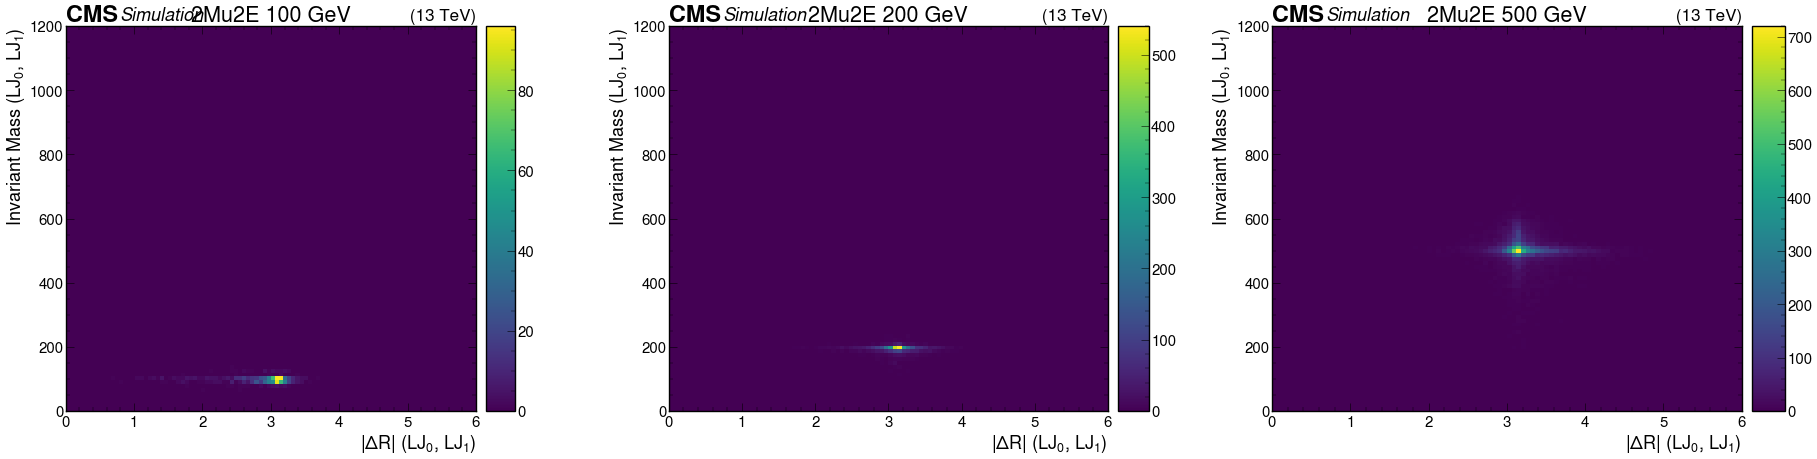

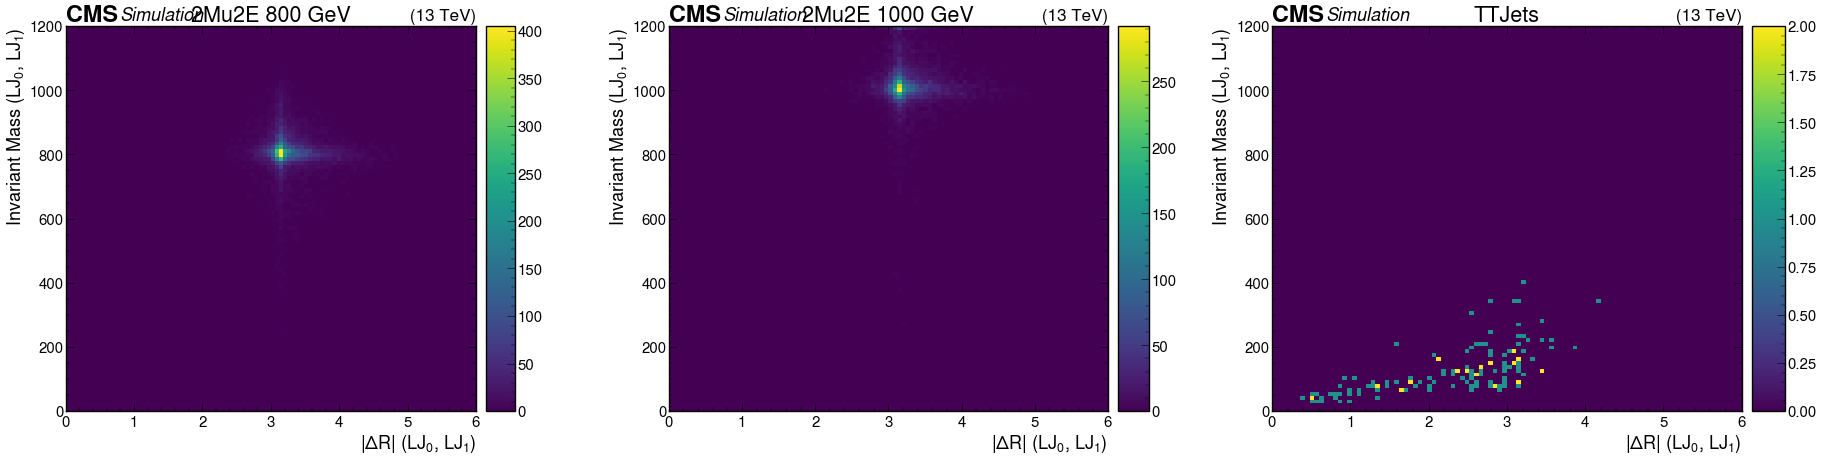

In [25]:
SIG_1 = output["out"][samples_2mu2e[0]]["hists"]
SIG_2 = output["out"][samples_2mu2e[1]]["hists"]
SIG_3 = output["out"][samples_2mu2e[2]]["hists"]
SIG_4 = output["out"][samples_2mu2e[3]]["hists"]
SIG_5 = output["out"][samples_2mu2e[4]]["hists"]
BKG = output["out"][samples_2mu2e[5]]["hists"]

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_1["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("2Mu2E 100 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_2["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("2Mu2E 200 GeV")

plt.subplot(1,3,3)
utilities.plot(SIG_3["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("2Mu2E 500 GeV")

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_4["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("2Mu2E 800 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_5["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("2Mu2E 1000 GeV")

plt.subplot(1,3,3)
utilities.plot(BKG["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("TTJets")

Text(0.5, 1.0, 'TTJets')

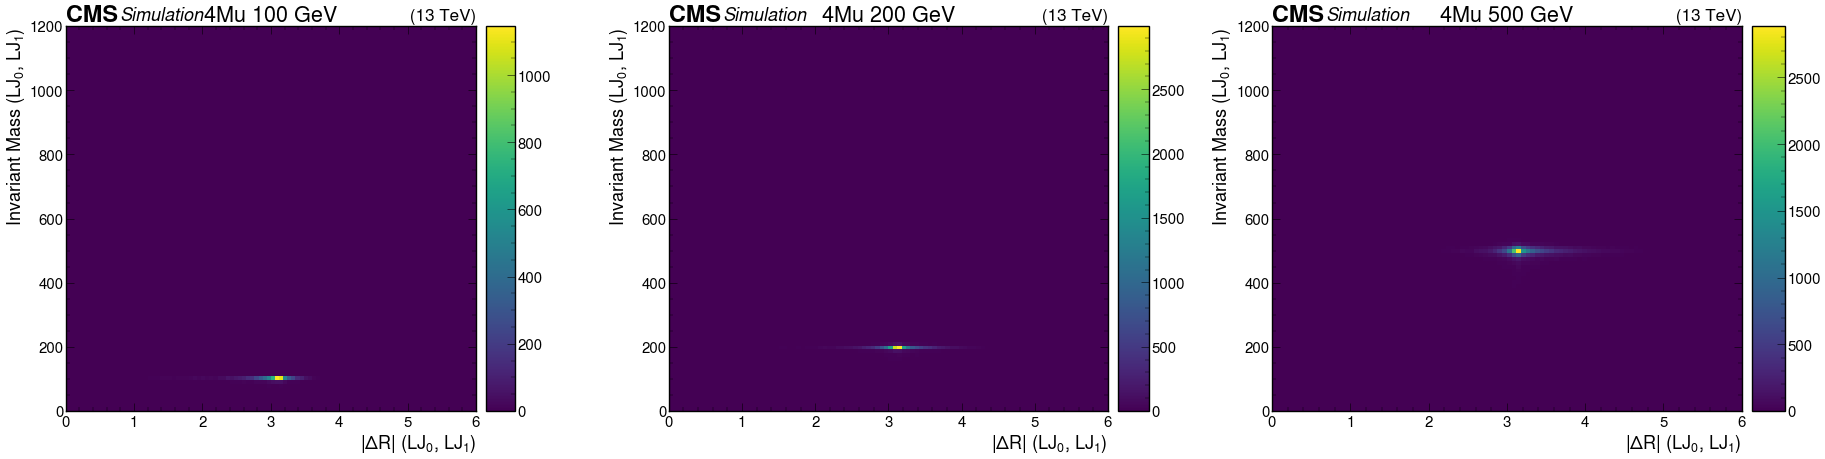

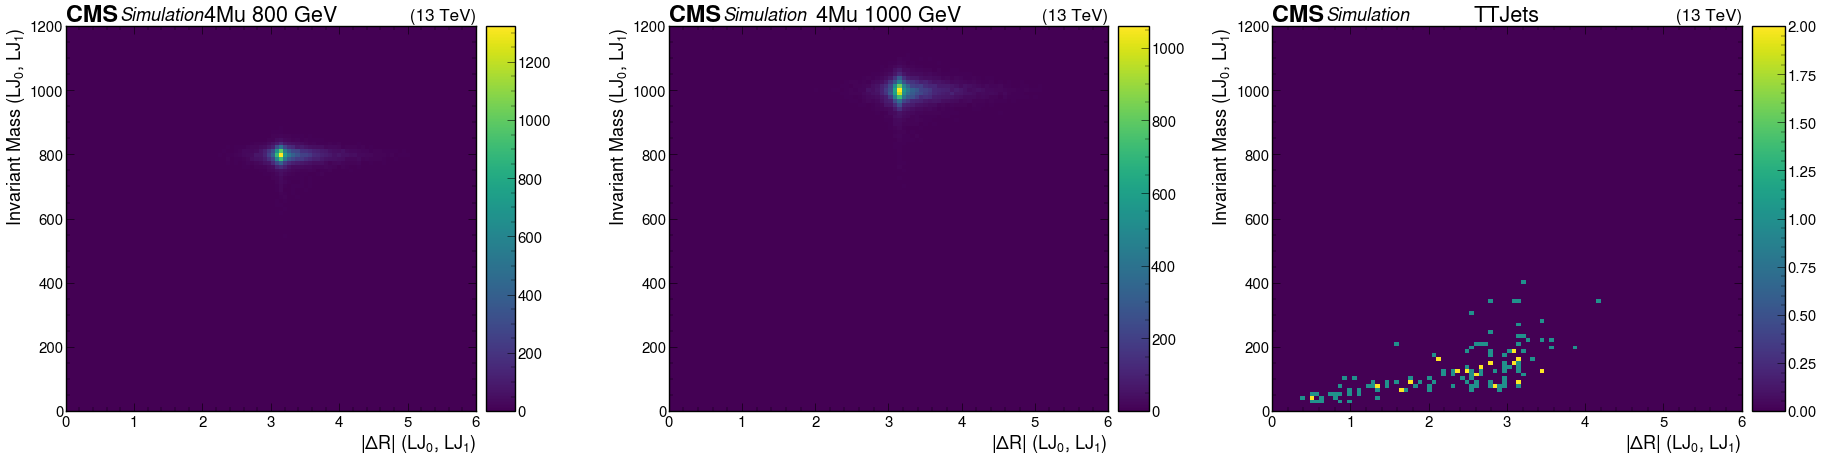

In [26]:
SIG_1 = output["out"][samples_4mu[0]]["hists"]
SIG_2 = output["out"][samples_4mu[1]]["hists"]
SIG_3 = output["out"][samples_4mu[2]]["hists"]
SIG_4 = output["out"][samples_4mu[3]]["hists"]
SIG_5 = output["out"][samples_4mu[4]]["hists"]
BKG = output["out"][samples_4mu[5]]["hists"]

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_1["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("4Mu 100 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_2["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("4Mu 200 GeV")

plt.subplot(1,3,3)
utilities.plot(SIG_3["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("4Mu 500 GeV")

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_4["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("4Mu 800 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_5["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("4Mu 1000 GeV")

plt.subplot(1,3,3)
utilities.plot(BKG["lj_lj_absdR_invmass"][channels[0], :, :])
plt.title("TTJets")

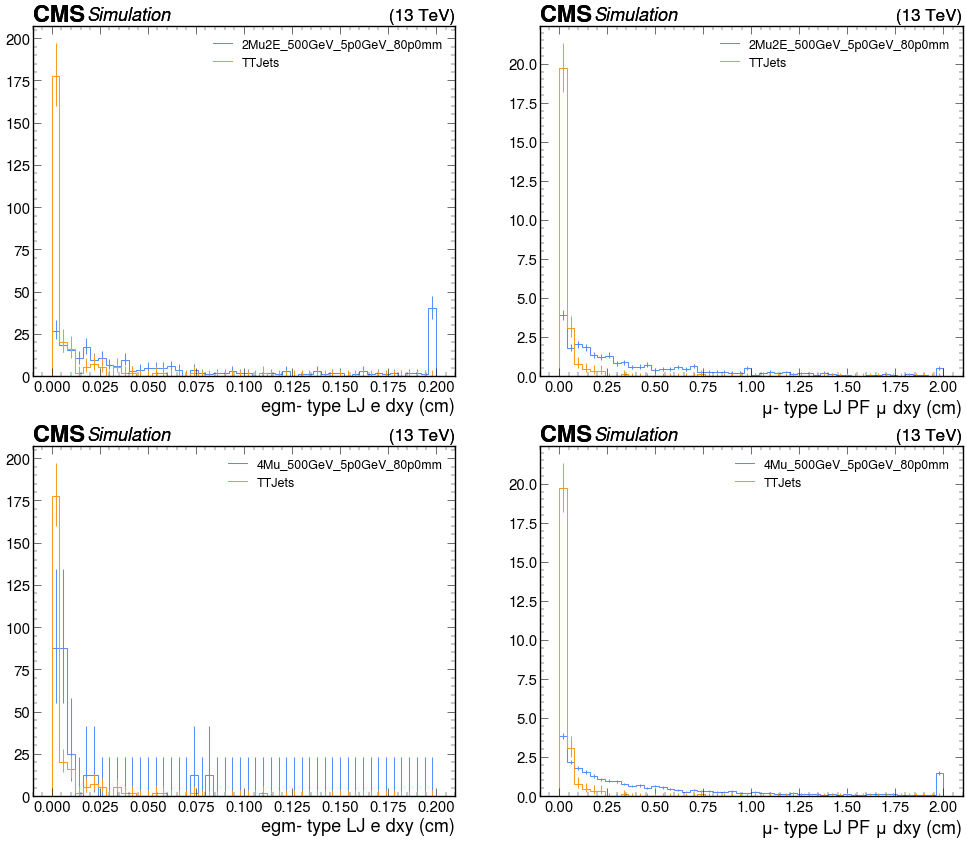

In [27]:
samples_2mu2e = [
    "2Mu2E_500GeV_5p0GeV_80p0mm",
    "TTJets"
]

samples_4mu = [    
    "4Mu_500GeV_5p0GeV_80p0mm",
    "TTJets"
]

plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_lj_electron_dxy_XXLowRange"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_lj_pfMuon_dxy_lowRange"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_lj_electron_dxy_XXLowRange"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_lj_pfMuon_dxy_lowRange"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

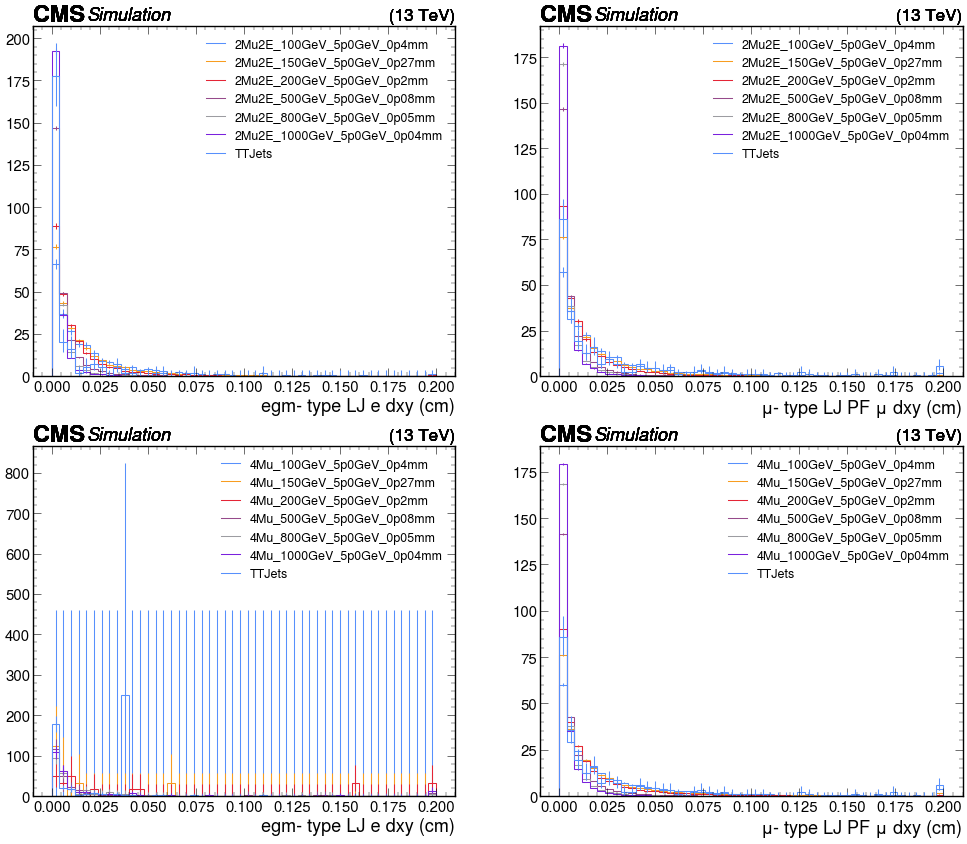

In [28]:
samples_2mu2e = [
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_150GeV_5p0GeV_0p27mm",
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_800GeV_5p0GeV_0p05mm",
    "2Mu2E_1000GeV_5p0GeV_0p04mm",  
    "TTJets"
]

samples_4mu = [    
    "4Mu_100GeV_5p0GeV_0p4mm",
    "4Mu_150GeV_5p0GeV_0p27mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_800GeV_5p0GeV_0p05mm",
    "4Mu_1000GeV_5p0GeV_0p04mm",
    "TTJets"
]

plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_lj_electron_dxy_XXLowRange"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_lj_pfMuon_dxy_XLowRange"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_lj_electron_dxy_XXLowRange"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_lj_pfMuon_dxy_XLowRange"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})